## Avayu Real Estate - Price Predictor

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506 with some missing data points

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM  ---------->            per capita crime rate by town
    2. ZN  ---------->              proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS  ---------->           proportion of non-retail business acres per town
    4. CHAS  ---------->            Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX  ---------->             nitric oxides concentration (parts per 10 million)
    6. RM  ---------->              average number of rooms per dwelling
    7. AGE  ---------->             proportion of owner-occupied units built prior to 1940
    8. DIS  ---------->             weighted distances to five Boston employment centres
    9. RAD  ---------->             index of accessibility to radial highways
    10. TAX  ---------->            full-value property-tax rate per $10,000
    11. PTRATIO  ---------->        pupil-teacher ratio by town
    12. B  ---------->              1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT  ---------->          % lower status of the population
    14. MEDV  ---------->           Median value of owner-occupied homes in $1000's
    

8. Missing Attribute Values:  None.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
housing = pd.read_csv("housing data with some missing features.csv")


In [3]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()


0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284250,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702665,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# For Plotting Histogram
# housing.hist(bins=50, figsize=(20, 15))


## Train-Test Splitting

In [8]:
import numpy as np


def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    # print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [9]:
# train_set, test_set = split_train_test(housing, 0.2)


In [10]:
# print(f"Rown in train set: {len(train_set)}\nRown in test set: {len(test_set)}\n")


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [12]:
print(
    f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 404
Rows in test set: 102



## Doing StratifiedShuffleSplit on CHAS so that its values get splitted equally in between training and testing data set (because CHAS has only 2 values - 0 or 1 so we need to distribute them equally)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [14]:
strat_test_set


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [15]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()


0    376
1     28
Name: CHAS, dtype: int64

In [17]:
95/7


13.571428571428571

In [18]:
376/28


13.428571428571429

In [19]:
# Changing the housing dataset to only training data set
housing = strat_train_set.copy()


## Looking for Correlations by making a correlation matrix

In [20]:
corr_matrix = housing.corr()


In [21]:
corr_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.258620,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.295136,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.385183,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100654,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.301129,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.258620,0.295136,-0.385183,0.100654,-0.301129,1.000000,-0.244269,0.206596,-0.201549,-0.283316,-0.330299,0.123703,-0.601216,0.680246
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.244269,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.206596,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.201549,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.283316,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.680246
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

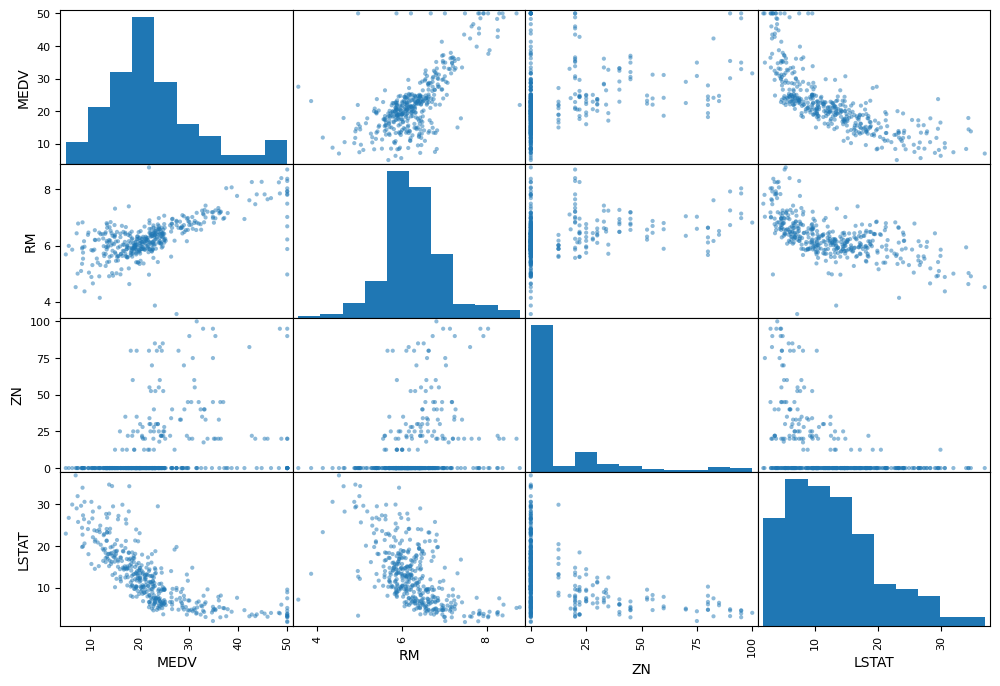

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# scatter_matrix(housing,figsize=(12,8))


<Axes: xlabel='RM', ylabel='MEDV'>

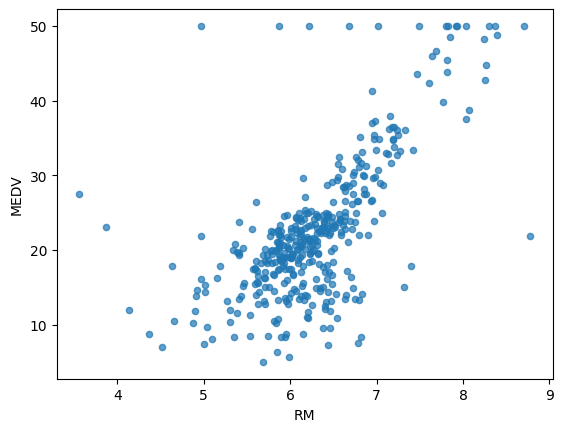

In [24]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.7)


## Trying out Attribute Combinations (Creating our own attribute)

In [25]:
housing['TAXRM'] = housing['TAX']/housing['RM']  # TAXRM = Tax per Room
housing['TAXRM']


254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [26]:
housing


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.680246
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524367
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

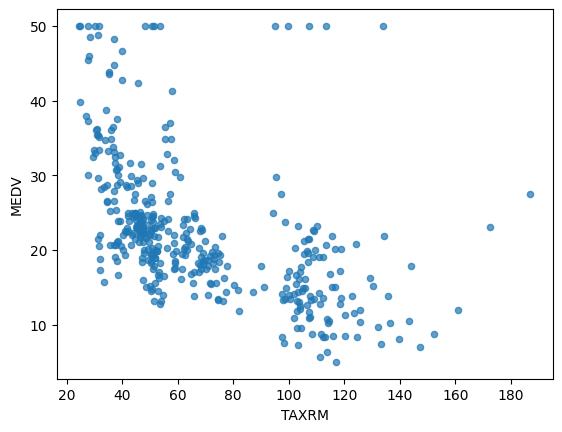

In [28]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV', alpha=0.7)


In [29]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()


## Missing Attributes (Data Cleaning)

In [30]:
# To take care of missing attributes, you have three options:
#       1. Get rid of the missing data points
#       2. Get rid of the whole attribute
#       3. Set the value to some value(0, mean or median)


In [31]:
a = housing.dropna(subset=['RM'])  # Option 1
a.shape
# It removes all nan values rows of RM column (Not a good option as we will lose some of our data)
# Note that the original housing dataframe will remain unchanged


(401, 13)

In [32]:
a = housing.drop("RM", axis=1)
a
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged
# It will remove RM column entirely (Not a good option as we will lose some of our data)


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [33]:
median = housing['RM'].median()  # Compute median for Option 3
# Note that the original housing dataframe will remain unchanged
# It is a good option as we are not removing any data, we are filling missing values with the help of available data, here we are filling it with median of previously available data


In [34]:
housing['RM'].fillna(median)


254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

## Doing the above work using sklearn simple imputer (Imputer is used to fill missing values)

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [36]:
imputer.statistics_


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
imputer.statistics_.shape


(13,)

In [38]:
X = imputer.transform(housing)
X  # A numpy Array


array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [39]:
# Transformed housing dataset
housing_tr = pd.DataFrame(X, columns=housing.columns)


In [40]:
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279200,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709691,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design


Primarily, three types of objects:-

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling (to get the data on same scale)

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min) / (max - min)
    Sklearn provides a class called MinMaxScaler for this

2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline (Series of Steps)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #   ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr  # A numpy Array


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape


(404, 13)

## Pre-processing has been done on our data, now we will train our model

## Selecting a desired model for Avayu Real Estates

## 1. Using Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)


LinearRegression()

In [45]:
some_data = housing.iloc[:5]


In [46]:
some_labels = housing_labels.iloc[:5]


In [47]:
prepared_data = my_pipeline.transform(some_data)


In [48]:
model.predict(prepared_data)


array([23.94801471, 27.21672426, 20.5930788 , 25.05328655, 23.76526376])

In [49]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)


In [51]:
lin_rmse


4.830426156461931

The above error is very big, so we will change our model

## Using better evaluation technique - Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [53]:
rmse_scores


array([4.23962586, 4.26372977, 5.11115681, 3.82958652, 5.34219611,
       4.38717552, 7.46192949, 5.46933081, 4.1824369 , 6.06696715])

In [54]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())


In [55]:
print_scores(rmse_scores)


Scores: [4.23962586 4.26372977 5.11115681 3.82958652 5.34219611 4.38717552
 7.46192949 5.46933081 4.1824369  6.06696715]
Mean:  5.035413494140651
Standard deviation: 1.052178389053691


## 2. Using Decision Tree Regression Model

In [56]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)


DecisionTreeRegressor()

In [57]:
# Taking the first 5 rows of input data
some_data = housing.iloc[:5]


In [58]:
# Taking the first 5 rows of output data
some_labels = housing_labels.iloc[:5]


In [59]:
prepared_data = my_pipeline.transform(some_data)


In [60]:
model.predict(prepared_data)


array([21.9, 24.5, 16.7, 23.1, 23. ])

In [61]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [62]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(lin_mse)


In [63]:
rmse


4.830426156461931

The above error is 0, so it is OverFitting

## Using better evaluation technique - Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [65]:
rmse_scores


array([4.21376953, 5.86346688, 5.01689827, 4.00134124, 3.91222443,
       2.90877981, 6.23746743, 3.91334256, 3.24299245, 3.6005208 ])

In [66]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())


In [67]:
print_scores(rmse_scores)


Scores: [4.21376953 5.86346688 5.01689827 4.00134124 3.91222443 2.90877981
 6.23746743 3.91334256 3.24299245 3.6005208 ]
Mean:  4.291080340850057
Standard deviation: 1.031983170632023


## 3. Using RandomForest Regressor Model

In [68]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [69]:
some_data = housing.iloc[:5]


In [70]:
some_labels = housing_labels.iloc[:5]


In [71]:
prepared_data = my_pipeline.transform(some_data)


In [72]:
model.predict(prepared_data)


array([22.36 , 25.561, 16.606, 23.284, 23.389])

In [73]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [74]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(lin_mse)


In [75]:
rmse


4.830426156461931

## Using better evaluation technique - Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [77]:
rmse_scores


array([2.9244803 , 2.86172529, 4.5822828 , 2.64256763, 3.39421808,
       2.47214326, 4.62874172, 3.31244856, 3.18364152, 3.37670043])

In [78]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())


In [79]:
print_scores(rmse_scores)


Scores: [2.9244803  2.86172529 4.5822828  2.64256763 3.39421808 2.47214326
 4.62874172 3.31244856 3.18364152 3.37670043]
Mean:  3.3378949576661983
Standard deviation: 0.6981806063523706


1. Linear Model:
    Mean:  5.035413494140651
    Standard deviation: 1.052178389053691

2. Decision Tree Regression Model
    Mean:  4.126713663360752
    Standard deviation: 0.7670224019035773

3. RandomForest Regressor Model
    Mean:  3.3110118858493904
    Standard deviation: 0.6959251017543918

## Here, we can see that Random forest Regressor model has least Standard deviation, so it is best performing model out of three models we have used, so we will use RandomForest Regressor Model.

## Saving the model, so that we dont't have to retrain the model again and again to use it.

In [80]:
from joblib import dump, load
# It will save the model, so that we don't have to retrain the entire model again and again
dump(model, 'Final Model.joblib')


['Final Model.joblib']

## Testing the model on test data

In [81]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [82]:
print(final_predictions)


[24.501 11.793 26.218 22.093 18.662 15.205 20.013 14.573 31.851 40.885
 19.581 11.852 25.906 26.375 19.406 10.977 31.421 14.566 23.443 19.554
 19.992 17.981 16.39  22.062 18.315 27.397 16.392 33.471  8.448 34.026
 24.136 21.385 23.302 10.929 20.651 11.339 42.84  24.718 23.486 41.768
 24.239 30.12  20.418 21.056 18.359 33.406 44.538 20.183 20.181 21.293
 21.374 14.505 20.834 15.143 25.177 33.087 41.127 28.603 19.234 20.585
 47.184  9.9   19.233 24.464 14.815 33.744 19.699 17.742 19.152 33.452
 26.001 23.182 21.175 22.87  34.677 13.674 16.053 20.113 20.848 21.09
 22.863 21.315 13.779 23.284 21.008 21.298 14.318 21.368 22.234 24.389
 18.528 27.368  7.759 26.499 17.956 29.58  19.386 30.99  15.179 26.881
 20.95  20.719]


In [83]:
print(list(Y_test))


[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


In [84]:
final_rmse


2.9596663398324563